#### Importing the main packages and modules for the project

In [1]:
import numpy as np
import pandas as pd
import requests as rq
import os
import json
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering Data

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)
file = 'image-predictions.tsv'

if not os.path.isfile(file):
    f = open(file , 'wb')
    f.write(response.content)
    f.close()
    
images = pd.read_csv(file, sep= '\t')

In [4]:
data_list = []

with open('tweet-json.txt', 'r') as f:
    for line in f:
        tw = json.loads(line)
        tw_id = tw['id']
        retw_counts = tw['retweet_count']
        fav_counts = tw['favorite_count']
        lang = tw['lang']
        data_list.append({'tweet_id' : tw_id,
                       'retweet_count' : retw_counts,
                       'favorite_count' : fav_counts,
                       'user_lang' : lang})
        
tweets = pd.DataFrame(data_list)

## Assessing Data
### Visual Assessment

In [5]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
tweets

,tweet_id,retweet_count,favorite_count,user_lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en
...,...,...,...,...
2349,666049248165822465,41,111,en
2350,666044226329800704,147,311,en
2351,666033412701032449,47,128,en
2352,666029285002620928,48,132,en


### Programmatical Assessment

In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
archive[archive['rating_numerator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None


In [12]:
archive[archive['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Jazz         1
DayZ         1
Rey          1
Holly        1
Mojo         1
Name: name, Length: 957, dtype: int64

In [14]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
convertible             1
prayer_rug              1
Japanese_spaniel        1
polecat                 1
carton                  1
Name: p1, Length: 378, dtype: int64

In [16]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [17]:
images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hair_slide              1
birdhouse               1
stove                   1
Windsor_tie             1
crutch                  1
Name: p2, Length: 405, dtype: int64

In [18]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [19]:
images['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
golfcart               1
bullfrog               1
green_lizard           1
space_shuttle          1
Windsor_tie            1
Name: p3, Length: 408, dtype: int64

In [20]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [21]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   user_lang       2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [22]:
tweets['user_lang'].value_counts()

en     2336
und       7
in        3
nl        3
tl        1
et        1
es        1
ro        1
eu        1
Name: user_lang, dtype: int64

### Quality Issues

#### `archive` table
- Some columns names should be changed such as: 'floofer' to floof, 'rating_numerator' to 'rat_of_10' ... etc.
- The 'tweet_id' column dtype should be changed from int64 to object.
- The 'timestamp' column dtype should be changed from object to datetime.
- The 'source' column is ambiguous and should be clarified.
- The 'text' column is messy and need clarifying and removing url.
- Inaccurate numerators and denominators values.
- Some missing names in 'name' column
- Removing retweeted and replies tweets.
- Getting rid of certainly not a dog data.
- Dropping useless columns.


#### `images` table
- p1, p2, p3 has uppercase and lowercase letters.
- The 'tweet_id' and 'img_num' columns dtype should be changed.


#### `tweets` table
- Language code is mysterous and should be changed to the whole language name.
- The 'tweet_id' column dtype should be changed from int64 to object.

### Tidiness Issues

- the 'timestamp' column should be split into hour, day, month and year.
- Dog stages is in 4 columns
- The whole data is separated into 3 different dataframes and should be merged together.
- Reshaping images prediction 9 columns associated with the 1st, 2nd and 3rd algorithms into 2 useful columns.

## Cleaning

In [23]:
archive_clean = archive.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

In [24]:
pd.options.mode.chained_assignment = None

#### `archive`: Changing floofer, rating_numerator, rating_denominator, expanded_url and name columns names.

##### Define
Rename floofer, rating_numerator, rating_denominator, expanded_urls and name columns.

##### Code

In [25]:
archive_clean.rename(columns= {'floofer' : 'floof', 'rating_numerator' : 'rate_of_10', 'rating_denominator' : 'rat_denom', 'expanded_urls' : 'url' , 'name' : 'dog_name'} , inplace = True)

##### Test

In [26]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   url                         2297 non-null   object 
 10  rate_of_10                  2356 non-null   int64  
 11  rat_denom                   2356 non-null   int64  
 12  dog_name                    2356 non-null   object 
 13  doggo                       2356 

#### The dtype of 'tweet_id' column in the 3 dataframes should be changed to object

##### Define
Change 'tweet_id' column dtype in the 3 dataframes from int64 to object.

##### Code

In [27]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

##### Check

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   url                         2297 non-null   object 
 10  rate_of_10                  2356 non-null   int64  
 11  rat_denom                   2356 non-null   int64  
 12  dog_name                    2356 non-null   object 
 13  doggo                       2356 

In [29]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [30]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   user_lang       2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


####  The 'timestamp' column dtype should be changed from object datetime.

##### Define
Change 'timestamp' column dtype should be changed from object to datetime64.

##### Code

In [31]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

##### Check

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   url                         2297 non-null   object             
 10  rate_of_10                  2356 non-null   int64           

####  The 'img_num' column dtype should be changed from float to int.

##### Define
Change img_num' column dtype from float to int.

##### Code

In [33]:
images_clean['img_num'] = images_clean['img_num'].astype(int)

##### Check

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   url                         2297 non-null   object             
 10  rate_of_10                  2356 non-null   int64           

#### `archive`: The 'source' column is ambiguous and should be clarified.

##### Define
Extract source to be clear.

##### Code

In [35]:
archive_clean['source'] = archive_clean['source'].str.extract('([>]\w.*)')
archive_clean['source'] = archive_clean['source'].str.strip('</a>')

##### Test

In [36]:
archive_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

#### `archive`: The 'text' coulmn is messy and need clarifying and removing url.

##### Define
Remove the url, \n and keep just the text.

##### Code

In [37]:
archive_clean['text'] = archive_clean['text'].str.replace(r'http.*', "").str.replace("\n", " ")

##### Test

In [38]:
archive_clean['text'][150]

"Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help   "

#### `archive`: Inaccurate numerators and denominators values.

##### Define
Extract the correct numerators and denominators from the text visually.

##### Code

In [39]:
indices = [784,1068, 1662, 342, 433, 902, 1120, 1165, 1202, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 313, 516, 2335, 188, 189, 290, 340, 695, 763, 979, 1712, 2074]
numerators = [14, 14, 10, 0, 0, 0, 0, 13, 11, 11, 10, 9, 12, 11, 2, 11, 11, 10, 12, 12, 11, 13, 0, 9, 20, 20, 18, 10, 10, 11, 18, 11, 20]
denominator = np.full((33,) , 10)

for i,j in zip(indices, numerators):
    archive_clean['rate_of_10'][i] = j

for i,j in zip(indices, denominator):
    archive_clean['rat_denom'][i] = j

##### Test

In [40]:
archive_clean['rate_of_10'].value_counts()

12    561
11    471
10    465
13    353
9     158
8     102
14     56
7      54
5      37
6      32
3      19
4      15
2      10
1       8
0       7
20      3
18      2
15      2
17      1
Name: rate_of_10, dtype: int64

#### `archive`:  Missing names in 'name' column.

##### Define
Extract names from the text.

##### Code

In [41]:
archive_clean['dog_name'] = archive_clean['dog_name'].str.replace('None' ,'')
archive_clean['dog_name'] = archive_clean['dog_name'].str.replace('a' ,'')
archive_clean['dog_name'] = archive_clean['dog_name'].str.replace('an' ,'')

archive_clean['names'] = archive_clean['text'].str.extract('([n][a][m][e][d]\s\S+\.)')
archive_clean['names'] = archive_clean['names'].str.extract('(\s\S+\.)')
archive_clean['names'] = archive_clean['names'].str[:-1]

archive_clean.loc[archive_clean['dog_name'] == "", "dog_name"] = archive_clean['names']
archive_clean = archive_clean.drop('names', axis = 1)

##### Test

In [42]:
archive_clean['dog_name'].value_counts()

Chrlie       12
Oliver       11
Lucy         11
Cooper       11
Penny        10
             ..
Dotsy         1
Brney         1
Skye          1
Schnitzel     1
Mrgo          1
Name: dog_name, Length: 971, dtype: int64

#### `images`:  p1, p2, p3 has uppercase and lowercase letters.

##### Define
Turn all letters of p1, p2 and p3 columns to lowercase.

##### Code

In [43]:
images_clean['p1'] = images_clean['p1'].str.lower()
images_clean['p2'] = images_clean['p2'].str.lower()
images_clean['p3'] = images_clean['p3'].str.lower()

##### Test

In [44]:
images_clean['p3'].value_counts()

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
                      ..
park_bench             1
rotisserie             1
orangutan              1
dugong                 1
wok                    1
Name: p3, Length: 408, dtype: int64

#### `tweets`:  Language code is mysterous and should be changed to the whole language name.

##### Define
Change languages codes into the whole language name.

##### Code

In [45]:
lang_code = ['en', 'und', 'nl', 'in', 'et', 'tl', 'eu', 'ro', 'es']
lang_name = ['English', 'Undetermined', 'Duetch', 'Indian', 'Estonian', 'Tagalog', 'Basque', 'Romanian', 'Spanish']

for i,j in zip(lang_code, lang_name):
    tweets_clean.loc[tweets_clean['user_lang'] == i, "user_lang"] = j

##### Test

In [46]:
tweets_clean['user_lang'].value_counts()

English         2336
Undetermined       7
Duetch             3
Indian             3
Basque             1
Spanish            1
Romanian           1
Tagalog            1
Estonian           1
Name: user_lang, dtype: int64

#### The 'timestamp' column should be split into hour, day, month and year.

##### Define
Create new columns hour, day, month and year from 'timestamp' column.

##### Code

In [47]:
archive_clean["tweet_hour"] = archive_clean['timestamp'].dt.hour
archive_clean["tweet_day"] = archive_clean['timestamp'].dt.day_name()

In [48]:
archive_clean['timestamp'] = archive_clean['timestamp'].astype(str)
archive_clean['tweet_month'] = archive_clean['timestamp'].str.extract('([-]..)')
archive_clean['tweet_month'] = archive_clean['tweet_month'].str.strip('-')
archive_clean['tweet_month'] = archive_clean['tweet_month'].astype(int)

In [49]:
archive_clean['timestamp'] = archive_clean['timestamp'].astype(str)
archive_clean['tweet_year'] = archive_clean['timestamp'].str.extract('(....)')
archive_clean['tweet_year'] = archive_clean['tweet_year'].astype(int)

##### Test

In [50]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   url                         2297 non-null   object 
 10  rate_of_10                  2356 non-null   int64  
 11  rat_denom                   2356 non-null   int64  
 12  dog_name                    1578 non-null   object 
 13  doggo                       2356 

#### Dog stages is in 4 columns.

##### Define
Create 1 column for dog stage.

##### Code

In [51]:
archive_clean['doggo'] = archive_clean['doggo'].str.replace('None' ,'')
archive_clean['floof'] = archive_clean['floof'].str.replace('None' ,'')
archive_clean['pupper'] = archive_clean['pupper'].str.replace('None' ,'')
archive_clean['puppo'] = archive_clean['puppo'].str.replace('None' ,'')

archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floof'] + archive_clean['pupper'] + archive_clean['puppo']
archive_clean['dog_stage'] = archive_clean['dog_stage'].str.replace('doggopupper' , 'doggo-pupper')
archive_clean['dog_stage'] = archive_clean['dog_stage'].str.replace('floofer' , 'floof')
archive_clean['dog_stage'] = archive_clean['dog_stage'].str.replace('doggofloofer' , 'doggo-floof')
archive_clean['dog_stage'] = archive_clean['dog_stage'].str.replace('doggopuppo' , 'doggo-puppo')

archive_clean['dog_stage'] = archive_clean['dog_stage'].replace(r'^\s*$', np.nan, regex=True)

##### Test

In [52]:
archive_clean['dog_stage'].value_counts()

pupper          245
doggo            83
puppo            29
doggo-pupper     12
floof             9
doggofloof        1
doggo-puppo       1
Name: dog_stage, dtype: int64

#### Reshaping images prediction 9 columns associated with the 1st, 2nd and 3rd algorithms into 2 useful columns.

##### Define
Create 2 useful columns from the 9 columns of Algorithms.

##### Code

In [53]:
images_clean['p1_dog'] = images_clean['p1_dog'].astype(str)
images_clean['p2_dog'] = images_clean['p2_dog'].astype(str)
images_clean['p3_dog'] = images_clean['p3_dog'].astype(str)

images_clean['p1_dog'] = images_clean['p1_dog'].str.replace('True' , '1')
images_clean['p2_dog'] = images_clean['p2_dog'].str.replace('True' , '1')
images_clean['p3_dog'] = images_clean['p3_dog'].str.replace('True' , '1')

images_clean['p1_dog'] = images_clean['p1_dog'].str.replace('False' , '0')
images_clean['p2_dog'] = images_clean['p2_dog'].str.replace('False' , '0')
images_clean['p3_dog'] = images_clean['p3_dog'].str.replace('False' , '0')

images_clean['p1_dog'] = images_clean['p1_dog'].astype(int)
images_clean['p2_dog'] = images_clean['p2_dog'].astype(int)
images_clean['p3_dog'] = images_clean['p3_dog'].astype(int)

In [54]:
images_clean['confidence'] = images_clean['p1_dog'] * images_clean['p1_conf'] + images_clean['p2_dog'] * images_clean['p2_conf'] + images_clean['p3_dog'] * images_clean['p3_conf']
images_clean['confidence'] = images_clean['confidence'] / 3

In [55]:
images_clean['dog_breed'] = 0

for i in range(2075):
    if images_clean['p1_conf'][i] > images_clean['p2_conf'][i] and images_clean['p1_conf'][i] > images_clean['p3_conf'][i]:
        images_clean['dog_breed'][i] = images_clean['p1'][i]
    elif images_clean['p2_conf'][i] > images_clean['p1_conf'][i] and images_clean['p2_conf'][i] > images_clean['p3_conf'][i]:
        images_clean['dog_breed'][i] = images_clean['p2'][i]
    else:
        images_clean['dog_breed'][i] = images_clean['p3'][i]

##### Test

In [56]:
images_clean['dog_breed'].value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
madagascar_cat          1
restaurant              1
revolver                1
peacock                 1
carton                  1
Name: dog_breed, Length: 378, dtype: int64

In [57]:
images_clean['dog_breed'].isnull().sum()

0

#### Merging the 3 dataframes.

##### Define
Merge the 3 datagrames in 1 master dataframe.

##### Code

In [58]:
df_merged = archive_clean.join(tweets_clean.set_index('tweet_id'), on='tweet_id')
df_merged = df_merged.join(images_clean.set_index('tweet_id'), on='tweet_id')

In [59]:
df_copy = df_merged.copy()

In [60]:
df_copy['retweet_count'] = df_copy['retweet_count'].astype(pd.Int64Dtype())
df_copy['favorite_count'] = df_copy['favorite_count'].astype(pd.Int64Dtype())

##### Test

In [61]:
df_copy['retweet_count'].value_counts()

1972    5
3652    5
83      5
1207    4
516     4
       ..
4653    1
2608    1
561     1
2610    1
274     1
Name: retweet_count, Length: 1724, dtype: Int64

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   url                         2297 non-null   object 
 10  rate_of_10                  2356 non-null   int64  
 11  rat_denom                   2356 non-null   int64  
 12  dog_name                    1578 non-null   object 
 13  doggo                       2356 

#### Removing retweeted and replies tweets.

##### Define
Delete retweeted and replies tweets.

##### Code

In [63]:
df_copy = df_copy[df_copy['in_reply_to_status_id'].isnull()]
df_copy = df_copy[df_copy['retweeted_status_id'].isnull()]

##### Test

In [64]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   url                         2094 non-null   object 
 10  rate_of_10                  2097 non-null   int64  
 11  rat_denom                   2097 non-null   int64  
 12  dog_name                    1460 non-null   object 
 13  doggo                       2097 

#### Getting rid of certainly not a dog data.

##### Define
Delete not a dag tweets.

##### Code

In [65]:
df_copy = df_copy[df_copy['confidence'] != 0.000000]

In [66]:
df_copy = df_copy.drop(123, axis = 0)

##### Test

In [67]:
df_copy['confidence'].value_counts()

0.296552    1
0.013032    1
0.304270    1
0.000904    1
0.110619    1
           ..
0.333310    1
0.308494    1
0.326920    1
0.279701    1
0.331578    1
Name: confidence, Length: 1665, dtype: int64

#### Droping useless columns and reshaping the dataframe.

##### Define
Drop useless columns and reshaping the dataframe.

##### Code

In [68]:
df_copy = df_copy.drop(['timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floof', 'pupper', 'puppo', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'jpg_url', 'confidence' , 'rat_denom'], axis = 1)

In [69]:
df_copy = df_copy.reindex(columns = ['tweet_id', 'url', 'text', 'source', 'tweet_hour', 'tweet_day', 'tweet_month', 'tweet_year', 'user_lang', 'dog_name', 'dog_stage', 'dog_breed', 'rate_of_10', 'retweet_count', 'favorite_count'])

##### Test

In [70]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1791 entries, 1 to 2355
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1791 non-null   object
 1   url             1788 non-null   object
 2   text            1791 non-null   object
 3   source          1791 non-null   object
 4   tweet_hour      1791 non-null   int64 
 5   tweet_day       1791 non-null   object
 6   tweet_month     1791 non-null   int32 
 7   tweet_year      1791 non-null   int32 
 8   user_lang       1791 non-null   object
 9   dog_name        1284 non-null   object
 10  dog_stage       290 non-null    object
 11  dog_breed       1665 non-null   object
 12  rate_of_10      1791 non-null   int64 
 13  retweet_count   1791 non-null   Int64 
 14  favorite_count  1791 non-null   Int64 
dtypes: Int64(2), int32(2), int64(2), object(9)
memory usage: 213.4+ KB


In [71]:
df_copy.head()

,tweet_id,url,text,source,tweet_hour,tweet_day,tweet_month,tweet_year,user_lang,dog_name,dog_stage,dog_breed,rate_of_10,retweet_count,favorite_count
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,This is Tilly. She's just checking pup on you....,Twitter for iPhone,0,Tuesday,8,2017,English,Tilly,NaN,chihuahua,13,6514,33819
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,0,Monday,7,2017,English,Archie,NaN,chihuahua,12,4328,25461
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,15,Sunday,7,2017,English,Drl,NaN,paper_towel,13,8964,42908
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,This is Franklin. He would like you to stop ca...,Twitter for iPhone,16,Saturday,7,2017,English,Frnklin,NaN,basset,12,9774,41048
5,891087950875897856,https://twitter.com/dog_rates/status/891087950...,Here we have a majestic great white breaching ...,Twitter for iPhone,0,Saturday,7,2017,English,NaN,NaN,chesapeake_bay_retriever,13,3261,20562


## Saving Master DataFrame

In [72]:
df_copy.to_csv('twitter_archive_master.csv', index=False)

## Data Alaysis and Visualization

In [73]:
df = df_copy.copy()

In [74]:
df.describe()

,tweet_hour,tweet_month,tweet_year,rate_of_10,retweet_count,favorite_count
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000
mean,9.860413,6.902848,2015.897822,10.860413,2892.500838,9275.979899
std,8.649381,4.094628,0.685159,1.822440,4831.133813,12494.042142
min,0.000000,1.000000,2015.000000,0.000000,16.000000,81.000000
25%,1.000000,3.000000,2015.000000,10.000000,665.500000,2243.000000
50%,5.000000,7.000000,2016.000000,11.000000,1483.000000,4493.000000
75%,18.000000,11.000000,2016.000000,12.000000,3318.000000,11723.500000
max,23.000000,12.000000,2017.000000,14.000000,79515.000000,132810.000000


In [75]:
df[['rate_of_10', 'retweet_count', 'favorite_count']].describe()

,rate_of_10,retweet_count,favorite_count
count,1791.000000,1791.000000,1791.000000
mean,10.860413,2892.500838,9275.979899
std,1.822440,4831.133813,12494.042142
min,0.000000,16.000000,81.000000
25%,10.000000,665.500000,2243.000000
50%,11.000000,1483.000000,4493.000000
75%,12.000000,3318.000000,11723.500000
max,14.000000,79515.000000,132810.000000


In [76]:
df.corr()

,tweet_hour,tweet_month,tweet_year,rate_of_10,retweet_count,favorite_count
tweet_hour,1.000000,0.032822,0.089128,0.062168,0.044339,0.049160
tweet_month,0.032822,1.000000,-0.696919,-0.197216,-0.072481,-0.138152
tweet_year,0.089128,-0.696919,1.000000,0.475797,0.325310,0.545129
rate_of_10,0.062168,-0.197216,0.475797,1.000000,0.311643,0.406066
retweet_count,0.044339,-0.072481,0.325310,0.311643,1.000000,0.911407
favorite_count,0.049160,-0.138152,0.545129,0.406066,0.911407,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1791 entries, 1 to 2355
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1791 non-null   object
 1   url             1788 non-null   object
 2   text            1791 non-null   object
 3   source          1791 non-null   object
 4   tweet_hour      1791 non-null   int64 
 5   tweet_day       1791 non-null   object
 6   tweet_month     1791 non-null   int32 
 7   tweet_year      1791 non-null   int32 
 8   user_lang       1791 non-null   object
 9   dog_name        1284 non-null   object
 10  dog_stage       290 non-null    object
 11  dog_breed       1665 non-null   object
 12  rate_of_10      1791 non-null   int64 
 13  retweet_count   1791 non-null   Int64 
 14  favorite_count  1791 non-null   Int64 
dtypes: Int64(2), int32(2), int64(2), object(9)
memory usage: 213.4+ KB


In [78]:
df.head()

,tweet_id,url,text,source,tweet_hour,tweet_day,tweet_month,tweet_year,user_lang,dog_name,dog_stage,dog_breed,rate_of_10,retweet_count,favorite_count
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,This is Tilly. She's just checking pup on you....,Twitter for iPhone,0,Tuesday,8,2017,English,Tilly,NaN,chihuahua,13,6514,33819
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,0,Monday,7,2017,English,Archie,NaN,chihuahua,12,4328,25461
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,15,Sunday,7,2017,English,Drl,NaN,paper_towel,13,8964,42908
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,This is Franklin. He would like you to stop ca...,Twitter for iPhone,16,Saturday,7,2017,English,Frnklin,NaN,basset,12,9774,41048
5,891087950875897856,https://twitter.com/dog_rates/status/891087950...,Here we have a majestic great white breaching ...,Twitter for iPhone,0,Saturday,7,2017,English,NaN,NaN,chesapeake_bay_retriever,13,3261,20562


#### [1] From the correlation function used before as df.corr() we could found that the retweets count and favourites count are highly correlated and so that we can consider the sum of them as representive of the tweet interaction.

In [79]:
df['tweet_interaction'] = df['retweet_count'] + df['favorite_count']

### [2] What is the most frequent time that account's admin used to tweet in?

In [80]:
df[['tweet_hour', 'tweet_day']].mode()

,tweet_hour,tweet_day
0,1,Monday


In [81]:
df['tweet_hour'].value_counts()

1     248
0     231
2     184
16    177
17    152
3     149
23    102
18     90
15     81
4      79
19     74
20     72
22     61
21     61
5      19
14      5
6       4
13      2
Name: tweet_hour, dtype: int64

### [3] What is the most attractive hours to tweet in so that tweets got high interactions?

In [82]:
df.groupby(['tweet_hour'])['tweet_interaction'].mean().sort_values(ascending = False).nlargest(10)

tweet_hour
6     51251.000000
13    19835.500000
16    18342.101695
0     17971.956710
18    15591.377778
15    14636.074074
23    12019.294118
22    12015.508197
20    11956.541667
19    11920.797297
Name: tweet_interaction, dtype: float64

### [4] How is the interaction with the account's tweets over time?

In [83]:
df.groupby(['tweet_year', 'tweet_month'])['tweet_interaction'].mean()

tweet_year  tweet_month
2015        11              1670.221239
            12              5468.155932
2016        1               5641.941935
            2               5156.764151
            3               6214.411765
            4               6347.892857
            5               8426.882353
            6              14153.126582
            7              10364.813953
            8              12347.816327
            9              14212.142857
            10             18383.940299
            11             18194.478261
            12             22444.381818
2017        1              24656.112903
            2              22597.015625
            3              26433.041667
            4              28343.542857
            5              35904.114286
            6              35815.688889
            7              39581.583333
            8              40333.000000
Name: tweet_interaction, dtype: float64

matplotlib.text.Text

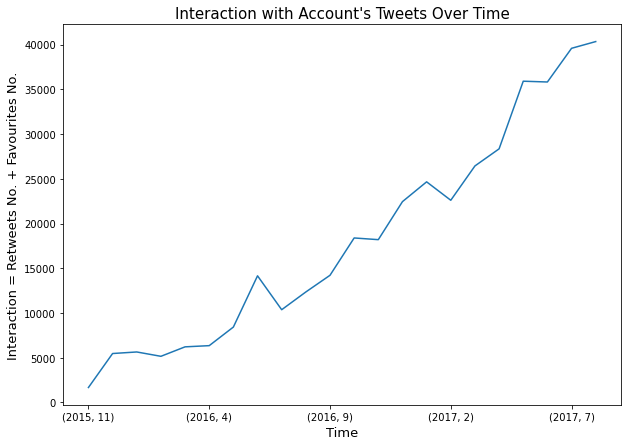

In [84]:
fig = plt.figure(figsize=(10,7))
plt.title("Interaction with Account's Tweets Over Time",fontsize=15)
#plt.xlabel("Time", fontsize=15)
plt.ylabel("Interaction = Retweets No. + Favourites No.", fontsize=13)
df.groupby(['tweet_year', 'tweet_month'])['tweet_interaction'].mean().plot(kind='line')
type(plt.xlabel("Time", fontsize=13))

### [5] What is the most familiar breed of dogs that most like to have?

In [85]:
df['dog_breed'].value_counts().nlargest(10)

golden_retriever      137
labrador_retriever     94
pembroke               88
chihuahua              78
pug                    54
chow                   41
samoyed                40
pomeranian             38
toy_poodle             37
malamute               29
Name: dog_breed, dtype: int64

matplotlib.text.Text

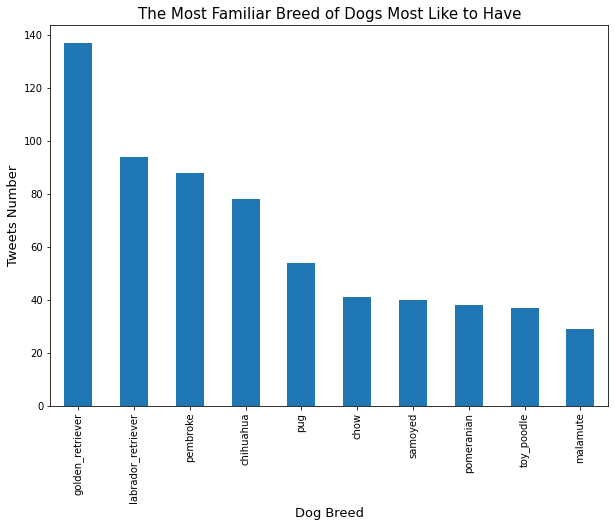

In [86]:
fig = plt.figure(figsize=(10,7))
plt.title("The Most Familiar Breed of Dogs Most Like to Have",fontsize=15)
plt.ylabel("Tweets Number", fontsize=13)
df['dog_breed'].value_counts().nlargest(10).plot(kind='bar')
type(plt.xlabel("Dog Breed", fontsize=13))

### [6] What is the top rated breeds of dogs?

In [87]:
df.groupby(['dog_breed'])['rate_of_10'].max().sort_values().nlargest(5)

dog_breed
french_bulldog      14
golden_retriever    14
eskimo_dog          14
gordon_setter       14
samoyed             14
Name: rate_of_10, dtype: int64

### [7] Some other insights

##### The most used source to tweet

In [88]:
df['source'].value_counts()

Twitter for iPhone     1666
Vine - Make a Scene      91
Twitter Web Client       25
TweetDeck                 9
Name: source, dtype: int64

##### The most common language of users

In [89]:
df['user_lang'].value_counts()

English         1785
Duetch             3
Basque             1
Undetermined       1
Estonian           1
Name: user_lang, dtype: int64